In [1]:
import bartide
bartide.__version__

'0.3.1'

In [2]:
for r1,r2 in bartide.glob_files('test_data', read1_pattern = "R1", read2_pattern = "R2", file_extension = "fastq.gz"):
    print (r1, r2)
    extractor = bartide.BarcodeExtractor(r1, r2, disable_progress_bar=True)
    extractor.identify_flanks()
    extractor.count_barcodes()
    corrector = bartide.SeqCorrect(disable_progress_bar=True)
    corrector.run(extractor.rawCounts)
    save_name = r1.replace('_R1.fastq.gz', '') + '.csv'
    corrector.save_to_csv(save_name)
    print ('-----\n')

In [3]:
analyzer = bartide.BarcodeAnalyzer('test_data')
analyzer.barcodes

INFO: 10 barcode files found


,LSK-B_T1,LSK-B_T2,LSK-ER_T1,LSK-ER_T2,LSK-MK_T1,LSK-MK_T2,LSK-MQ_T1,LSK-MQ_T2,LSK-MY_T1,LSK-MY_T2
barcodes,,,,,,,,,,
AAAGCAGGATTCTAAACCAAATTAATG,0,1145,0,0,0,241,0,0,0,0
AAATTTGGCAGTGTCACGGTAGGTGTG,0,0,0,0,97,0,0,0,0,0
AACAGGATCGTAGTGGGTAAGTGAAAC,0,0,0,0,0,0,0,135,0,0
AACCGGACTGACGGGAATGCGGTCTTT,0,0,0,0,0,24,0,0,0,0
AACTCTATCTTTTACGCTTAATCAGTT,0,0,232,286,103,85,0,0,48,59
...,...,...,...,...,...,...,...,...,...,...
TTTTCATACCCTGTACCGACGTTCTCG,0,0,0,0,179,91,0,0,41,39
TTTTCGATTCGTCCTTAGGGGGGACGG,0,0,0,0,0,0,25,0,0,0
TTTTGCGCAATTTAAATGTATTCCGTA,0,0,49,0,0,0,0,0,0,0


In [4]:
analyzer.merge_groups(['B', 'B', 'ER', 'ER', 'MK', 'MK', 'MQ', 'MQ', 'MY', 'MY'])

In [5]:
analyzer.total_barcodes()

group
B      8
ER    54
MK    68
MQ    31
MY    82
dtype: int64

In [6]:
analyzer.all_overlaps()

0

In [7]:
analyzer.calc_pairwise_overlap()

,B,ER,MK,MQ,MY
B,3,0,4,3,1
ER,0,18,21,9,29
MK,4,21,25,15,31
MQ,3,9,15,6,21
MY,1,29,31,21,29


In [8]:
analyzer.calc_multi_overlap()

B      ER     MK     MQ     MY   
False  False  False  False  True     29
                     True   False     6
                            True      7
              True   False  False    25
                            True     12
                     True   False     2
                            True      4
       True   False  False  False    18
                            True     13
                     True   True      2
              True   False  False     7
                            True      7
                     True   True      7
True   False  False  False  False     3
                     True   False     1
              True   False  False     2
                     True   False     1
                            True      1
dtype: int64

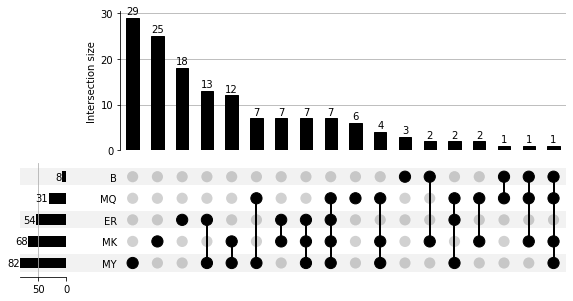

In [9]:
analyzer.plot_upset(save_name='./images/upset_plot.png')

In [10]:
analyzer.calc_percentage_overlap().round(2)

,B,ER,MK,MQ,MY
B,27.27,0.00,4.17,5.56,0.90
ER,0.00,23.38,21.88,16.67,26.13
MK,36.36,27.27,26.04,27.78,27.93
MQ,27.27,11.69,15.62,11.11,18.92
MY,9.09,37.66,32.29,38.89,26.13


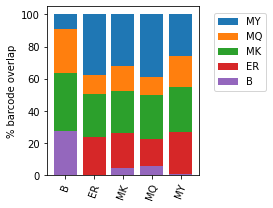

In [11]:
analyzer.plot_stacked(fig_size=(4,3), save_name='./images/stacked_plot.png')

In [12]:
analyzer.calc_pairwise_overlap(corrected=True)

,B,ER,MK,MQ,MY
B,1.000000,0.000000,0.055556,0.083333,0.011236
ER,0.000000,1.000000,0.207921,0.118421,0.271028
MK,0.055556,0.207921,1.000000,0.178571,0.260504
MQ,0.083333,0.118421,0.178571,1.000000,0.228261
MY,0.011236,0.271028,0.260504,0.228261,1.000000


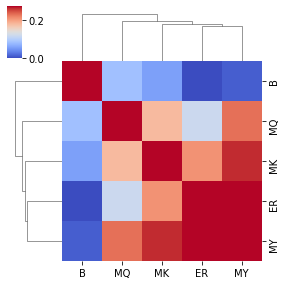

In [13]:
analyzer.plot_overlap_heatmap(fig_size=(4,4), save_name='./images/overlap_heatmap.png')

In [14]:
analyzer.calc_weighted_overlap()

,B,ER,MK,MQ,MY
B,1.000000,0.000000,0.240058,0.393086,0.130218
ER,0.000000,1.000000,0.843237,0.534626,0.594077
MK,0.240058,0.843237,1.000000,0.709495,0.691919
MQ,0.393086,0.534626,0.709495,1.000000,0.715117
MY,0.130218,0.594077,0.691919,0.715117,1.000000


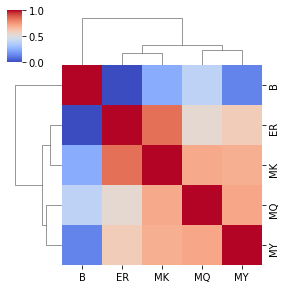

In [15]:
analyzer.plot_weighted_heatmap(fig_size=(4,4), save_name='./images/weighted_heatmap.png')